In [21]:
import math
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [22]:
%matplotlib inline
rcParams['figure.figsize']=10,6
sb.set_style('whitegrid')

In [23]:
floc = r'Heart.csv'
# DF = pd.read_csv(floc,index_col='Age', encoding='utf-8',parse_dates =True)
DF = pd.read_csv(floc,encoding='utf-8',parse_dates =True)  # All population

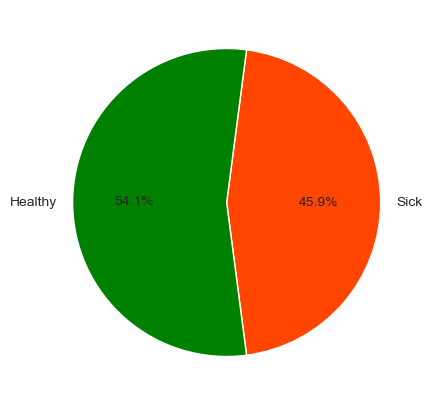

In [24]:
P = DF.shape[0]   
PS = DF.loc[(DF['AHD']=='Yes')].shape[0]                      # Population Sick Count
PH = DF.loc[(DF['AHD']=='No')].shape[0]                       # Population Healthy Count

Divisions = 6

Themin = (math.floor(DF[['Age']].min()/ 10.0)) * 10
Themax = (math.ceil(DF[['Age']].max()/ 10.0)) * 10
bins = np.linspace(Themin, Themax, Divisions)

Ranges_count_Sick=[]
for j in range(len(DF["AHD"].unique())):
    for i in range(len(bins)-1):
        k = DF.loc[(DF['Age']>=bins[i])*(DF['Age']<bins[i+1])*(DF['AHD']>=DF["AHD"].unique()[j])].shape[0]
        if DF["AHD"].unique()[j]=='Yes':
            Ranges_count_Sick.append(k)

# make figure and assign axis objects
fig, ax1 = plt.subplots(1, 1, figsize=(9, 5))

# pie chart parameters
overall_ratios = [PS/P, PH/P]
labels = ['Sick', 'Healthy']
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, colors=["orangered", "green"])
plt.savefig('Data Represenation/1-Population Pie.png',dpi = 600)

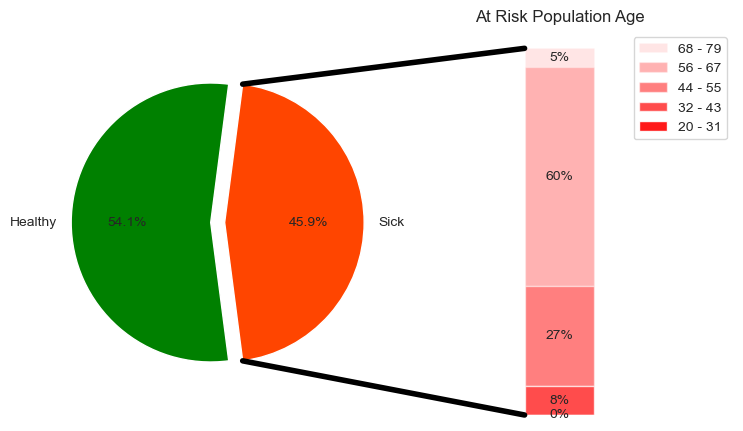

In [25]:
P = DF.shape[0]   
PS = DF.loc[(DF['AHD']=='Yes')].shape[0]                      # Population Sick Count
PH = DF.loc[(DF['AHD']=='No')].shape[0]                       # Population Healthy Count

Divisions = 6

Themin = (math.floor(DF[['Age']].min()/ 10.0)) * 10
Themax = (math.ceil(DF[['Age']].max()/ 10.0)) * 10
bins = np.linspace(Themin, Themax, Divisions)

Ranges_count_Sick=[]
for j in range(len(DF["AHD"].unique())):
    for i in range(len(bins)-1):
        k = DF.loc[(DF['Age']>=bins[i])*(DF['Age']<bins[i+1])*(DF['AHD']>=DF["AHD"].unique()[j])].shape[0]
        if DF["AHD"].unique()[j]=='Yes':
            Ranges_count_Sick.append(k)

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [PS/P, PH/P]
labels = ['Sick', 'Healthy']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode,colors=["orangered", "green"])

# bar chart parameters
age_ratios = [x/PS for x in Ranges_count_Sick]
age_labels=[]
for i in range(len(bins)-1):
    k = f'{int(bins[i])} - {int(bins[i+1]-1)}'
    age_labels.append(str(k))
age_labels
bottom = 1
width = .2



# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='red', label=label,
                 alpha=0.1 + (1/(Divisions-1)) * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('At Risk Population Age')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.savefig('Data Represenation/2-Age Pie.png',dpi = 600)

### Age Range Bars

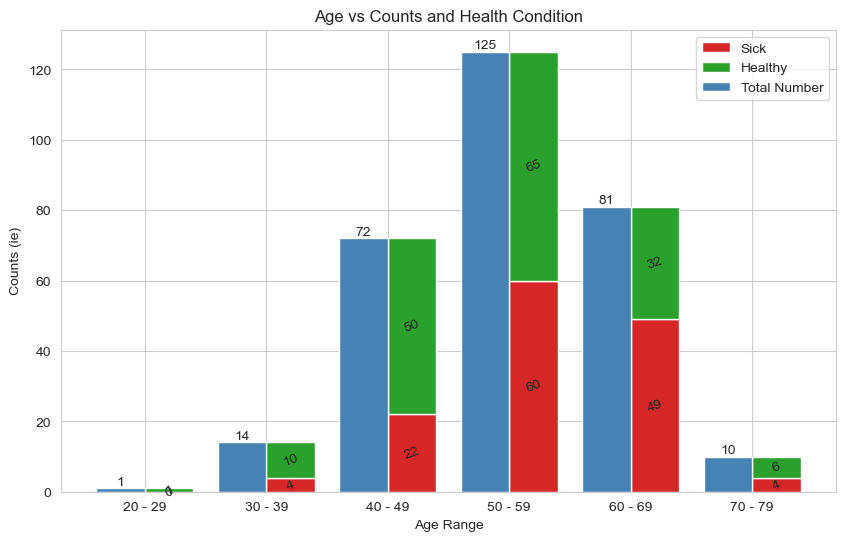

In [26]:
Themin = (math.floor(DF[['Age']].min()/ 10.0)) * 10
Themax = (math.ceil(DF[['Age']].max()/ 10.0)) * 10
bins = np.linspace(Themin, Themax, 7)

X=[]
for i in range(len(bins)-1):
    k = f'{int(bins[i])} - {int(bins[i+1]-1)}'
    X.append(str(k))
X

fig, ax = plt.subplots()

Ranges_count_Healthy=[]
Ranges_count_Sick=[]
for j in range(len(DF["AHD"].unique())):
    for i in range(len(bins)-1):
        k = DF.loc[(DF['Age']>=bins[i])*(DF['Age']<bins[i+1])*(DF['AHD']==DF["AHD"].unique()[j])].shape[0]
        if DF["AHD"].unique()[j]=='No':
            Ranges_count_Healthy.append(k)
        else:
            Ranges_count_Sick.append(k)


Age_counts = {'Sick':(Ranges_count_Sick),'Healthy':(Ranges_count_Healthy)}

bottom = np.zeros(len(X))
Color = ['tab:red','tab:green']
i = 0
for Age, Age_count in Age_counts.items():
    p = ax.bar(X, Age_count, width = 0.4, label=Age, bottom=bottom, align = 'edge',color = Color[i])
    bottom += Age_count
    i=i+1
    ax.bar_label(p, label_type='center',rotation = 20)

Ranges_count=[]
for i in range(len(bins)-1):
    k = DF.loc[(DF['Age']>=bins[i])*(DF['Age']<bins[i+1])].shape[0]
    Ranges_count.append(k)
Ranges_count


X_axis = np.arange(len(X))
Bar_Container = ax.bar(X,Ranges_count,width=-0.4,label = 'Total Number', align = 'edge', color = 'steelblue')
ax.bar_label(Bar_Container)
  
plt.xticks(X_axis, X)
plt.xlabel("Age Range")
plt.ylabel("Counts (ie)")
plt.title('Age vs Counts and Health Condition')
plt.legend()

plt.savefig('Data Represenation/3-Age.png',dpi=600)

## Gender vs Healthy and sick Analysis

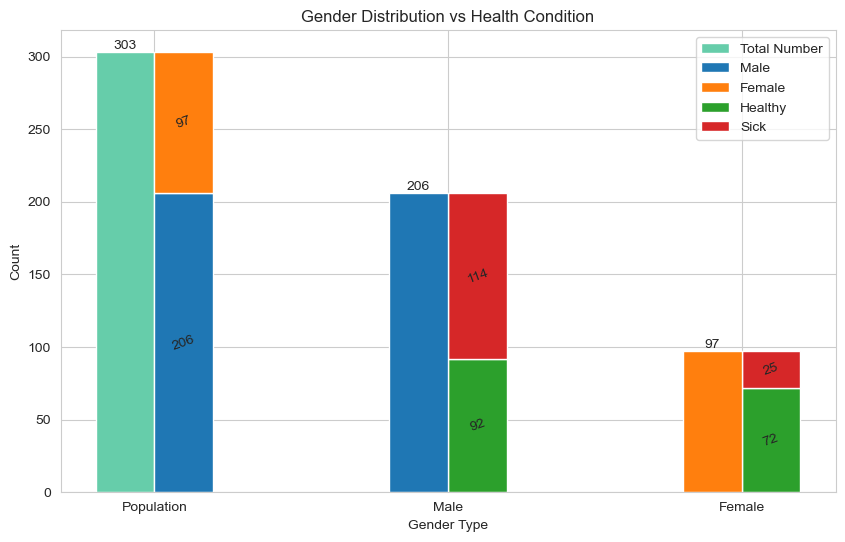

In [27]:
P = DF.shape[0]                                               # Population Count
PS = DF.loc[(DF['AHD']=='Yes')].shape[0]                      # Population Sick Count
PH = DF.loc[(DF['AHD']=='No')].shape[0]                       # Population Healthy Count
PM = DF.loc[(DF['Sex']==1)].shape[0]                          # Population Male Count
PF = DF.loc[(DF['Sex']==0)].shape[0]                          # Population Female Count
PMS = DF.loc[(DF['Sex']==1)*(DF['AHD']=='Yes')].shape[0]      # Population Male and Sick
PMH = DF.loc[(DF['Sex']==1)*(DF['AHD']=='No')].shape[0]       # Population Male and Healthy
PFS = DF.loc[(DF['Sex']==0)*(DF['AHD']=='Yes')].shape[0]      # Population Female and Sick
PFH = DF.loc[(DF['Sex']==0)*(DF['AHD']=='No')].shape[0]       # Population Female and Healthy

fig, ax = plt.subplots()

X = ['Population']
Frequency = [P]
X_axis = np.arange(len(X))
Bar_Container = ax.bar(X,Frequency,width=-0.2,label = 'Total Number',align = 'edge', color = "mediumaquamarine")
ax.bar_label(Bar_Container)

sex_counts = {
    'Male':([PM]),
    'Female': 
    ([PF]),}

bottom = np.zeros(len(X))

for sex, sex_count in sex_counts.items():
    p = ax.bar(X, sex_count, width = 0.2, label=sex, bottom=bottom, align = 'edge')
    bottom += sex_count
    ax.bar_label(p, label_type='center',rotation = 20)


X = ['Male','Female']
sex_counts = {'Healthy': 
    ([PMH,PFH]),
    'Sick':([PMS,PFS]),
    }
bottom = np.zeros(len(X))
for sex, sex_count in sex_counts.items():
        p = ax.bar(X, sex_count, width =0.2, label=sex, bottom=bottom, align = 'edge')
        bottom += sex_count
        ax.bar_label(p, label_type='center',rotation = 20)

        
Frequency = [PM,PF]
Bar_Container = ax.bar(X,Frequency,width=-0.2, align = 'edge', color = ['tab:blue','tab:orange'])
ax.bar_label(Bar_Container)


X = ['Population','Male','Female']
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
plt.xlabel("Gender Type")
plt.ylabel("Count")
plt.title("Gender Distribution vs Health Condition")
plt.legend()
plt.savefig('Data Represenation/4-Gender.png',dpi=600)

### Fasting Blood Sugar

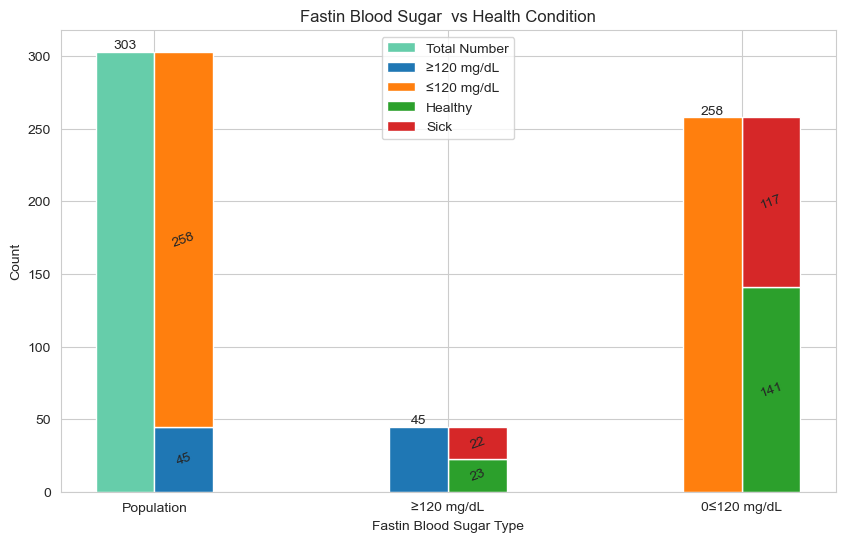

In [28]:
P = DF.shape[0]                                               # Population Count
PS = DF.loc[(DF['AHD']=='Yes')].shape[0]                      # Population Sick Count
PH = DF.loc[(DF['AHD']=='No')].shape[0]                       # Population Healthy Count
PM = DF.loc[(DF['Fbs']==1)].shape[0]                          # Population Male Count
PF = DF.loc[(DF['Fbs']==0)].shape[0]                          # Population Female Count
PMS = DF.loc[(DF['Fbs']==1)*(DF['AHD']=='Yes')].shape[0]      # Population Male and Sick
PMH = DF.loc[(DF['Fbs']==1)*(DF['AHD']=='No')].shape[0]       # Population Male and Healthy
PFS = DF.loc[(DF['Fbs']==0)*(DF['AHD']=='Yes')].shape[0]      # Population Female and Sick
PFH = DF.loc[(DF['Fbs']==0)*(DF['AHD']=='No')].shape[0]       # Population Female and Healthy

fig, ax = plt.subplots()

X = ['Population']
Frequency = [P]
X_axis = np.arange(len(X))
Bar_Container = ax.bar(X,Frequency,width=-0.2,label = 'Total Number',align = 'edge', color = "mediumaquamarine")
ax.bar_label(Bar_Container)

FBS_counts = {
    '≥120 mg/dL':([PM]),
    '≤120 mg/dL': 
    ([PF]),}

bottom = np.zeros(len(X))

for FBS, FBS_count in FBS_counts.items():
    p = ax.bar(X, FBS_count, width = 0.2, label=FBS, bottom=bottom, align = 'edge')
    bottom += FBS_count
    ax.bar_label(p, label_type='center',rotation = 20)


X = ['≥120 mg/dL','0≤120 mg/dL']
FBS_counts = {'Healthy': 
    ([PMH,PFH]),
    'Sick':([PMS,PFS]),
    }
bottom = np.zeros(len(X))
for FBS, FBS_count in FBS_counts.items():
        p = ax.bar(X, FBS_count, width =0.2, label=FBS, bottom=bottom, align = 'edge')
        bottom += FBS_count
        ax.bar_label(p, label_type='center',rotation = 20)

        
Frequency = [PM,PF]
Bar_Container = ax.bar(X,Frequency,width=-0.2, align = 'edge', color = ['tab:blue','tab:orange'])
ax.bar_label(Bar_Container)


X = ['Population','≥120 mg/dL','0≤120 mg/dL']
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
plt.xlabel("Fastin Blood Sugar Type")
plt.ylabel("Count")
plt.title("Fastin Blood Sugar  vs Health Condition")
plt.legend()

plt.savefig('Data Represenation/5-Fastin Blood Sugar.png',dpi=600)

### Rest PBS Bars

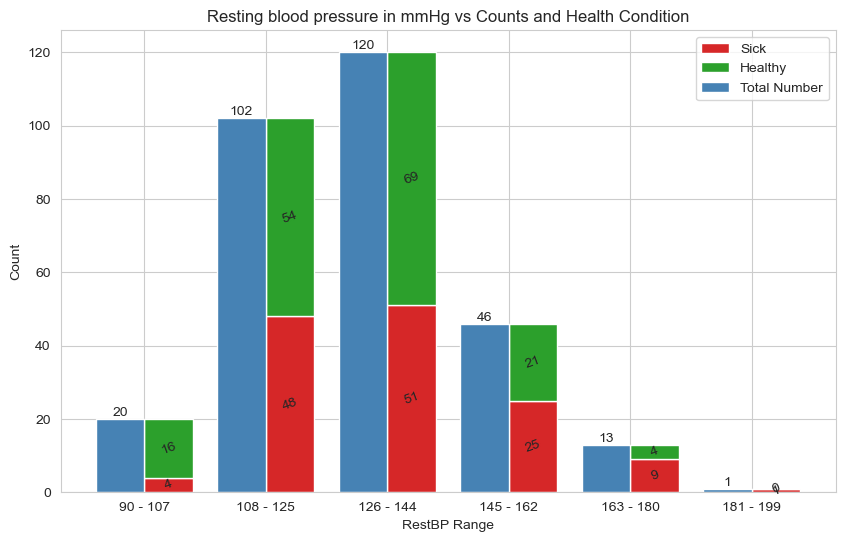

In [29]:
Themin = (math.floor(DF[['RestBP']].min()/ 10.0)) * 10
Themax = (math.ceil(DF[['RestBP']].max()/ 10.0)) * 10
bins = np.linspace(Themin, Themax, 7)

X=[]
for i in range(len(bins)-1):
    k = f'{int(bins[i])} - {int(bins[i+1]-1)}'
    X.append(str(k))
X

fig, ax = plt.subplots()

Ranges_count_Healthy=[]
Ranges_count_Sick=[]
for j in range(len(DF["AHD"].unique())):
    for i in range(len(bins)-1):
        k = DF.loc[(DF['RestBP']>=bins[i])*(DF['RestBP']<bins[i+1])*(DF['AHD']==DF["AHD"].unique()[j])].shape[0]
        if DF["AHD"].unique()[j]=='No':
            Ranges_count_Healthy.append(k)
        else:
            Ranges_count_Sick.append(k)


RestBP_counts = {'Sick':(Ranges_count_Sick),'Healthy':(Ranges_count_Healthy)}

bottom = np.zeros(len(X))
Color = ['tab:red','tab:green']
i = 0
for RestBP, RestBP_count in RestBP_counts.items():
    p = ax.bar(X, RestBP_count, width = 0.4, label=RestBP, bottom=bottom, align = 'edge', color = Color[i])
    bottom += RestBP_count
    ax.bar_label(p,label_type='center',rotation = 20)
    i=i+1



Ranges_count=[]
for i in range(len(bins)-1):
    k = DF.loc[(DF['RestBP']>=bins[i])*(DF['RestBP']<bins[i+1])].shape[0]
    Ranges_count.append(k)
Ranges_count


X_axis = np.arange(len(X))
Bar_Container = ax.bar(X,Ranges_count,width=-0.4,label = 'Total Number', align = 'edge',color='steelblue')
ax.bar_label(Bar_Container)
  
plt.xticks(X_axis, X)
plt.xlabel("RestBP Range")
plt.ylabel("Count")
plt.title('Resting blood pressure in mmHg vs Counts and Health Condition')
plt.legend()
plt.savefig('Data Represenation/6-Resting BP.png',dpi=600)

## Chest Pain vs Healthy and sick Analysis

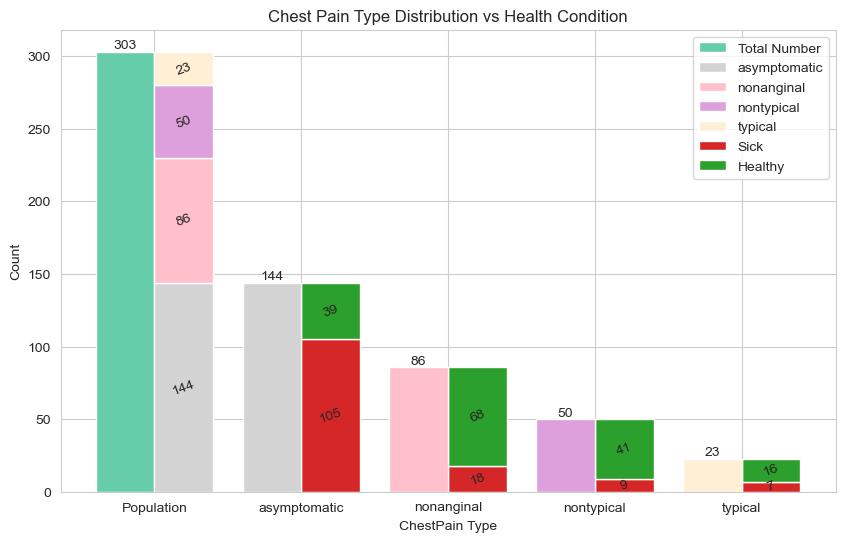

In [30]:
P = DF.shape[0]                                               # Population Count

P1 = DF.loc[(DF['ChestPain']=='asymptomatic')].shape[0]      
P2 = DF.loc[(DF['ChestPain']=='nonanginal')].shape[0]             
P3 = DF.loc[(DF['ChestPain']=='nontypical')].shape[0]                  
P4 = DF.loc[(DF['ChestPain']=='typical')].shape[0]           
             
P1S = DF.loc[(DF['ChestPain']=='asymptomatic')*(DF['AHD']=='Yes')].shape[0]      
P2S = DF.loc[(DF['ChestPain']=='nonanginal')*(DF['AHD']=='Yes')].shape[0]             
P3S = DF.loc[(DF['ChestPain']=='nontypical')*(DF['AHD']=='Yes')].shape[0]                  
P4S = DF.loc[(DF['ChestPain']=='typical')*(DF['AHD']=='Yes')].shape[0] 

P1H = DF.loc[(DF['ChestPain']=='asymptomatic')*(DF['AHD']=='No')].shape[0]      
P2H = DF.loc[(DF['ChestPain']=='nonanginal')*(DF['AHD']=='No')].shape[0]             
P3H = DF.loc[(DF['ChestPain']=='nontypical')*(DF['AHD']=='No')].shape[0]                  
P4H = DF.loc[(DF['ChestPain']=='typical')*(DF['AHD']=='No')].shape[0] 

fig, ax = plt.subplots()

X = ['Population']
Frequency = [P]
X_axis = np.arange(len(X))
Bar_Container = ax.bar(X,Frequency,width=-0.4,label = 'Total Number',align = 'edge', color = "mediumaquamarine")
ax.bar_label(Bar_Container)

CP_counts = {
    "asymptomatic":([P1]),"nonanginal":([P2]),"nontypical":([P3]),
    "typical": ([P4]),}

bottom = np.zeros(len(X))
Color = ['lightGray','pink','plum','papayawhip']
i = 0
for CP, CP_count in CP_counts.items():
    p = ax.bar(X, CP_count, width = 0.4, label=CP, bottom=bottom, align = 'edge',color = Color[i])
    bottom += CP_count
    i = i+1
    ax.bar_label(p, label_type='center',rotation = 20)


X = ["asymptomatic", "nonanginal" , "nontypical", "typical"]
CP_counts = {
    'Sick':([P1S,P2S,P3S,P4S]),
    'Healthy': 
    ([P1H,P2H,P3H,P4H]),}
bottom = np.zeros(len(X))
Color = ['tab:red','tab:green']
i = 0
for CP, CP_count in CP_counts.items():
        p = ax.bar(X, CP_count, width =0.4, label=CP, bottom=bottom, align = 'edge',color = Color[i])
        bottom += CP_count
        i = i+1
        ax.bar_label(p, label_type='center',rotation = 20)

        
Frequency = [P1,P2,P3,P4]
Bar_Container = ax.bar(X,Frequency,width=-0.4, align = 'edge', color = ['lightGray','pink','plum','papayawhip'])
ax.bar_label(Bar_Container)


X = ['Population',"asymptomatic", "nonanginal" , "nontypical", "typical"]
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
plt.xlabel("ChestPain Type")
plt.ylabel("Count")
plt.title("Chest Pain Type Distribution vs Health Condition")
plt.legend()

plt.savefig('Data Represenation/7-Chest Pain Type.png',dpi=600)

### Max HR

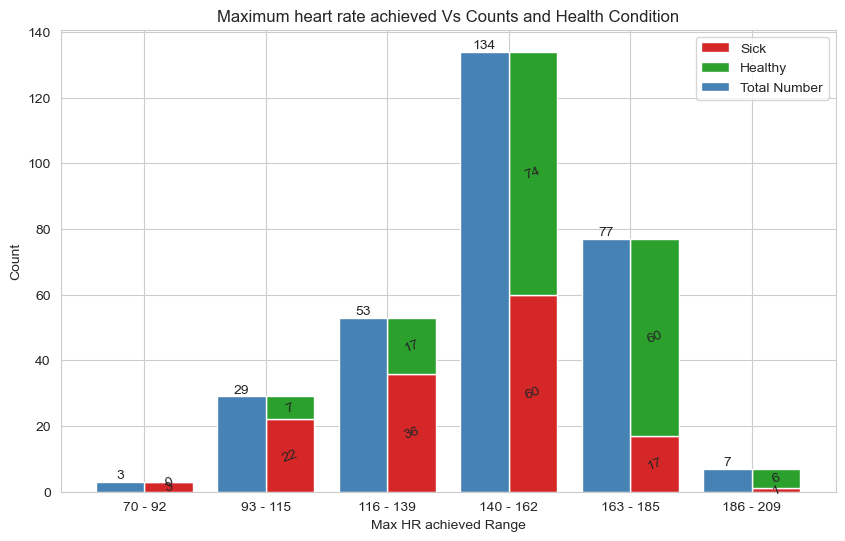

In [32]:
Themin = (math.floor(DF[['MaxHR']].min()/ 10.0)) * 10
Themax = (math.ceil(DF[['MaxHR']].max()/ 10.0)) * 10
bins = np.linspace(Themin, Themax, 7)

X=[]
for i in range(len(bins)-1):
    k = f'{int(bins[i])} - {int(bins[i+1]-1)}'
    X.append(str(k))
X

fig, ax = plt.subplots()

Ranges_count_Healthy=[]
Ranges_count_Sick=[]
for j in range(len(DF["AHD"].unique())):
    for i in range(len(bins)-1):
        k = DF.loc[(DF['MaxHR']>=bins[i])*(DF['MaxHR']<bins[i+1])*(DF['AHD']==DF["AHD"].unique()[j])].shape[0]
        if DF["AHD"].unique()[j]=='No':
            Ranges_count_Healthy.append(k)
        else:
            Ranges_count_Sick.append(k)


MaxHR_counts = {'Sick':(Ranges_count_Sick),'Healthy':(Ranges_count_Healthy)}

bottom = np.zeros(len(X))
Color = ['tab:red','tab:green']
i = 0
for MaxHR, MaxHR_count in MaxHR_counts.items():
    p = ax.bar(X, MaxHR_count, width = 0.4, label=MaxHR, bottom=bottom, align = 'edge',color = Color[i])
    bottom += MaxHR_count
    i=i+1
    ax.bar_label(p, label_type='center',rotation = 20)

Ranges_count=[]
for i in range(len(bins)-1):
    k = DF.loc[(DF['MaxHR']>=bins[i])*(DF['MaxHR']<bins[i+1])].shape[0]
    Ranges_count.append(k)
Ranges_count


X_axis = np.arange(len(X))
Bar_Container = ax.bar(X,Ranges_count,width=-0.4,label = 'Total Number', align = 'edge',color='steelblue')
ax.bar_label(Bar_Container)
  
plt.xticks(X_axis, X)
plt.xlabel("Max HR achieved Range")
plt.ylabel("Count")
plt.title("Maximum heart rate achieved Vs Counts and Health Condition")
plt.legend()

plt.savefig('Data Represenation/8-Max heart rate achieved.png',dpi=600)

### Serum cholesterol Range

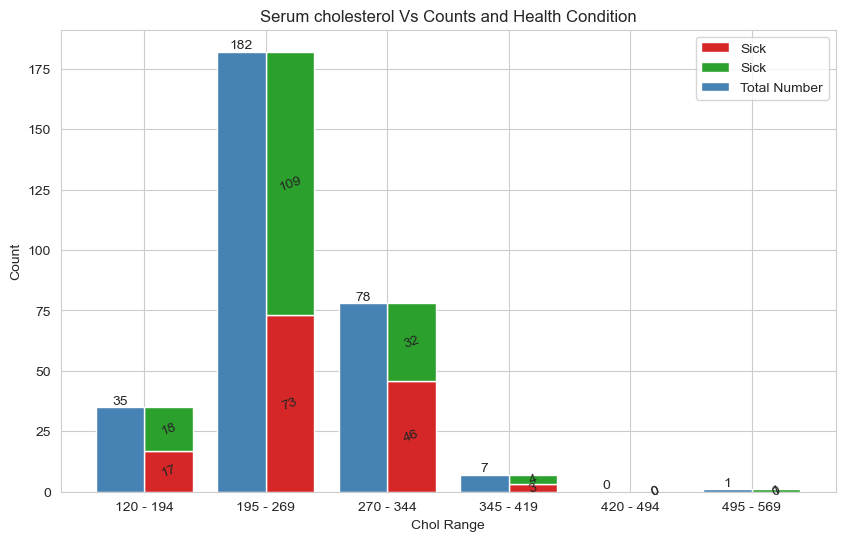

In [33]:
Themin = (math.floor(DF[['Chol']].min()/ 10.0)) * 10
Themax = (math.ceil(DF[['Chol']].max()/ 10.0)) * 10
bins = np.linspace(Themin, Themax, 7)

X=[]
for i in range(len(bins)-1):
    k = f'{int(bins[i])} - {int(bins[i+1]-1)}'
    X.append(str(k))
X

fig, ax = plt.subplots()

Ranges_count_Healthy=[]
Ranges_count_Sick=[]
for j in range(len(DF["AHD"].unique())):
    for i in range(len(bins)-1):
        k = DF.loc[(DF['Chol']>=bins[i])*(DF['Chol']<bins[i+1])*(DF['AHD']==DF["AHD"].unique()[j])].shape[0]
        if DF["AHD"].unique()[j]=='No':
            Ranges_count_Healthy.append(k)
        else:
            Ranges_count_Sick.append(k)


Chol_counts = {'Sick':(Ranges_count_Sick),'Healthy':(Ranges_count_Healthy)}

bottom = np.zeros(len(X))
Color = ['tab:red','tab:green']
i = 0
for Chol, Chol_count in Chol_counts.items():
    p = ax.bar(X, Chol_count, width = 0.4, label=sex, bottom=bottom, align = 'edge',color = Color[i])
    bottom += Chol_count
    i=i+1
    ax.bar_label(p, label_type='center',rotation = 20)

Ranges_count=[]
for i in range(len(bins)-1):
    k = DF.loc[(DF['Chol']>=bins[i])*(DF['Chol']<bins[i+1])].shape[0]
    Ranges_count.append(k)
Ranges_count


X_axis = np.arange(len(X))
Bar_Container = ax.bar(X,Ranges_count,width=-0.4,label = 'Total Number', align = 'edge',color ='steelblue')
ax.bar_label(Bar_Container)
  
plt.xticks(X_axis, X)
plt.xlabel("Chol Range")
plt.ylabel("Count")
plt.title("Serum cholesterol Vs Counts and Health Condition")
plt.legend()


plt.savefig('Data Represenation/9-Serum cholesterol.png',dpi=600)

### Thal Frequency

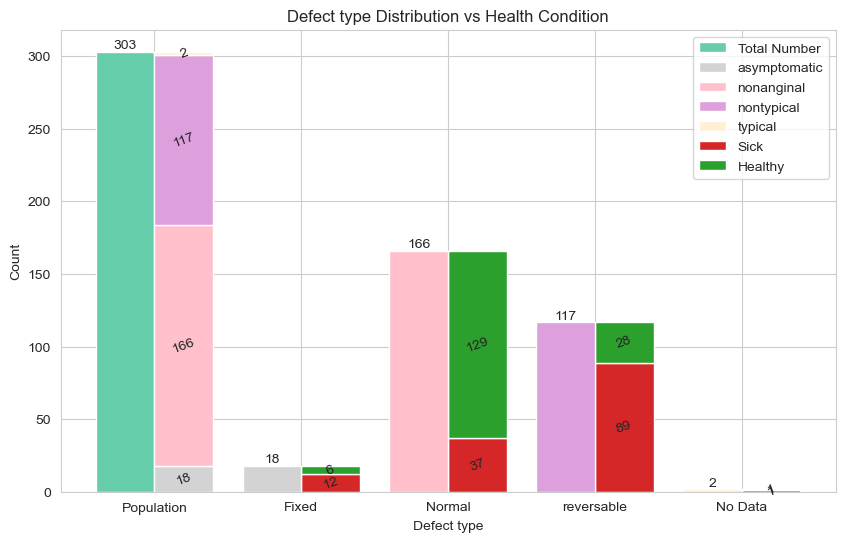

In [34]:
P = DF.shape[0]                                               # Population Count
PS = DF.loc[(DF['AHD']=='Yes')].shape[0]                      # Population Sick Count
PH = DF.loc[(DF['AHD']=='No')].shape[0]                       # Population Healthy Count

P1 = DF.loc[(DF['Thal']=='fixed')].shape[0]      
P2 = DF.loc[(DF['Thal']=='normal')].shape[0]             
P3 = DF.loc[(DF['Thal']=='reversable')].shape[0]                  
P4 = P-P1-P2-P3           
             
P1S = DF.loc[(DF['Thal']=='fixed')*(DF['AHD']=='Yes')].shape[0]      
P2S = DF.loc[(DF['Thal']=='normal')*(DF['AHD']=='Yes')].shape[0]             
P3S = DF.loc[(DF['Thal']=='reversable')*(DF['AHD']=='Yes')].shape[0]                  
P4S = PS-P1S-P2S-P3S

P1H = DF.loc[(DF['Thal']=='fixed')*(DF['AHD']=='No')].shape[0]      
P2H = DF.loc[(DF['Thal']=='normal')*(DF['AHD']=='No')].shape[0]             
P3H = DF.loc[(DF['Thal']=='reversable')*(DF['AHD']=='No')].shape[0]                  
P4H = PH-P1H-P2H-P3H

fig, ax = plt.subplots()

X = ['Population']
Frequency = [P]
X_axis = np.arange(len(X))
Bar_Container = ax.bar(X,Frequency,width=-0.4,label = 'Total Number',align = 'edge', color = "mediumaquamarine")
ax.bar_label(Bar_Container)

Thal_counts = {
    "asymptomatic":([P1]),"nonanginal":([P2]),"nontypical":([P3]),
    "typical": ([P4]),}

bottom = np.zeros(len(X))
Color = ['lightGray','pink','plum','papayawhip']
i = 0
for Thal, Thal_count in Thal_counts.items():
    p = ax.bar(X, Thal_count, width = 0.4, label=Thal, bottom=bottom, align = 'edge',color = Color[i])
    bottom += Thal_count
    i = i+1
    ax.bar_label(p, label_type='center',rotation = 20)


X = ["Fixed" , "Normal", "reversable", 'No Data']
Thal_counts = {
    'Sick':([P1S,P2S,P3S,P4S]),
    'Healthy': 
    ([P1H,P2H,P3H,P4H]),}
bottom = np.zeros(len(X))

Color = ['tab:red','tab:green']
i = 0

for Thal, Thal_count in Thal_counts.items():
        p = ax.bar(X, Thal_count, width =0.4, label=Thal, bottom=bottom, align = 'edge',color = Color[i])
        bottom += Thal_count
        i=i+1
        ax.bar_label(p, label_type='center',rotation = 20)

        
Frequency = [P1,P2,P3,P4]
Bar_Container = ax.bar(X,Frequency,width=-0.4, align = 'edge', color = ['lightGray','pink','plum','papayawhip'])
ax.bar_label(Bar_Container)


X = ['Population',"Fixed" , "Normal", "reversable", 'No Data']
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
plt.xlabel("Defect type")
plt.ylabel("Count")
plt.title("Defect type Distribution vs Health Condition")
plt.legend()

plt.savefig('Data Represenation/9-Defect type.png',dpi=600)